In [2]:
# this is python 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook')

In [3]:
df = pd.read_csv('uci_housing_data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


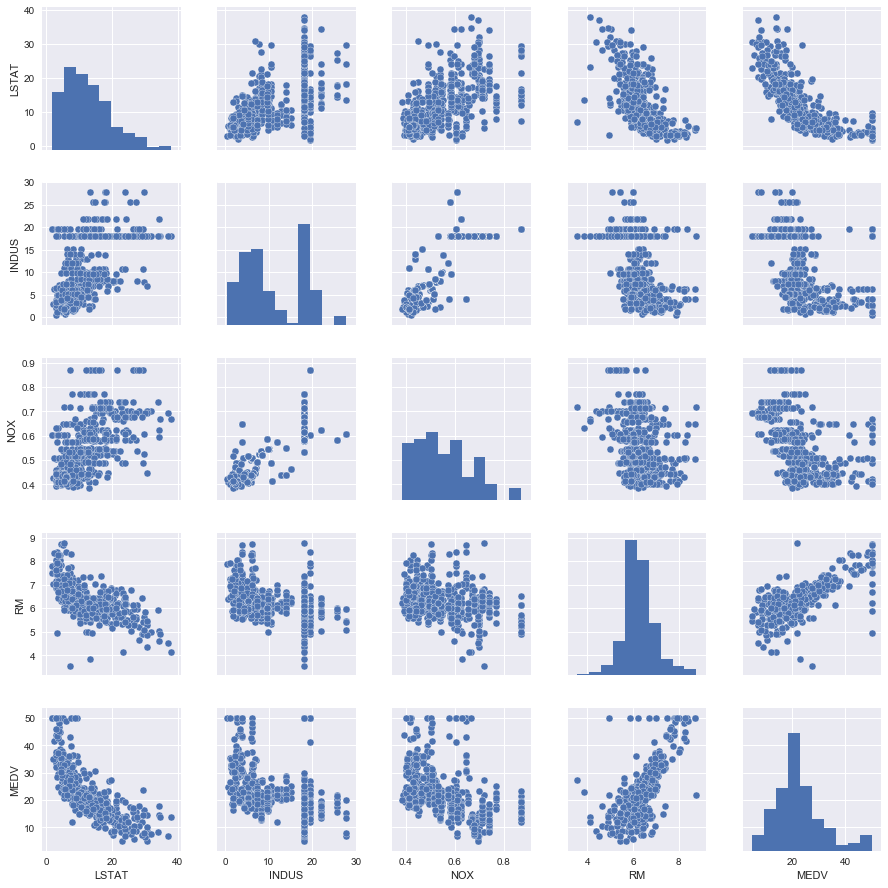

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()

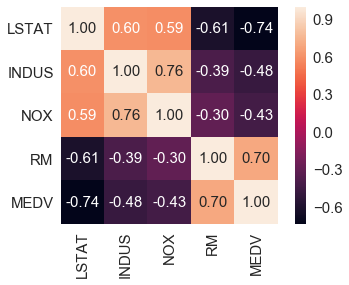

In [6]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
   yticklabels=cols, xticklabels=cols)

In [46]:
from sklearn.preprocessing import StandardScaler
StandardScaler?

In [10]:
from sklearn.linear_model import LinearRegression
X = df[['RM']].values
y = df['MEDV'].values
slr = LinearRegression()
slr.fit(X, y)
print('Slope: {}\nIntercept: {}'.format(slr.coef_[0], slr.intercept_))

Slope: 9.10210898118031
Intercept: -34.67062077643857


In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()



Slope: [9.10210898] 
Intercept: -34.67062077643857


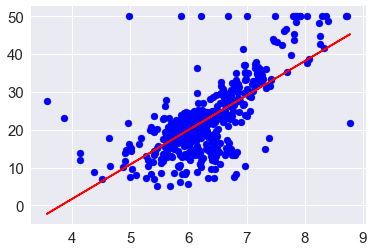

In [12]:
print("Slope: {slope} \nIntercept: {intercept}".format(slope=slr.coef_, intercept=slr.intercept_))
plt.scatter(X, y, c='blue')
plt.plot(X, slr.predict(X), color='red')

In [15]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

(-10, 50)

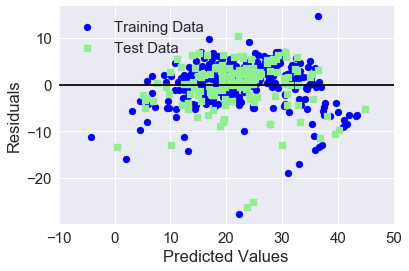

In [17]:
plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', marker='o', label="Training Data")
plt.scatter(y_test_pred, y_test_pred - y_test, color='lightgreen', marker='s', label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(0, xmin=-10, xmax=50)
plt.xlim(-10, 50)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE train: {}".format(mean_squared_error(y_train, y_train_pred)))
print("MSE test:  {}".format(mean_squared_error(y_test, y_test_pred)))
print("r^2 train: {}".format(r2_score(y_train, y_train_pred)))
print("r^2 test: {}".format(r2_score(y_test, y_test_pred)))

MSE train: 19.958219814238042
MSE test:  27.195965766883443
r^2 train: 0.7645451026942549
r^2 test: 0.6733825506400166


In [39]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge = Ridge(alpha=100000.0)
lasso = Lasso(alpha=5.0)
elanet = ElasticNet(alpha=1.0, l1_ratio=0.4)

In [40]:
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

elanet.fit(X_train, y_train)
y_train_pred_elanet = elanet.predict(X_train)
y_test_pred_elanet = elanet.predict(X_test)

print('Ridge MSE: {:0.4}; R^2: {:0.4}'.format(r2_score(y_test, y_test_pred_ridge), mean_squared_error(y_test, y_test_pred_ridge)))
print('Lasso MSE: {:0.4}; R^2: {:0.4}'.format(r2_score(y_test, y_test_pred_lasso), mean_squared_error(y_test, y_test_pred_lasso)))
print('Elanet MSE: {:0.4}; R^2: {:0.4}'.format(r2_score(y_test, y_test_pred_elanet), mean_squared_error(y_test, y_test_pred_elanet)))

Ridge MSE: 0.2351; R^2: 63.69
Lasso MSE: 0.5211; R^2: 39.88
Elanet MSE: 0.6181; R^2: 31.8


(-30, 20)

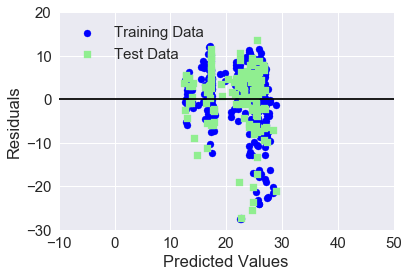

In [41]:
plt.scatter(y_train_pred_ridge, y_train_pred_ridge - y_train, color='blue', marker='o', label="Training Data")
plt.scatter(y_test_pred_ridge, y_test_pred_ridge - y_test, color='lightgreen', marker='s', label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(0, xmin=-10, xmax=50)
plt.xlim(-10, 50)
plt.ylim(-30, 20)

(-30, 20)

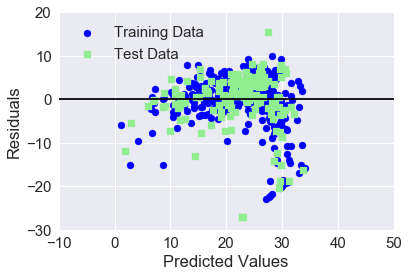

In [42]:
plt.scatter(y_train_pred_lasso, y_train_pred_lasso - y_train, color='blue', marker='o', label="Training Data")
plt.scatter(y_test_pred_lasso, y_test_pred_lasso - y_test, color='lightgreen', marker='s', label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(0, xmin=-10, xmax=50)
plt.xlim(-10, 50)
plt.ylim(-30, 20)

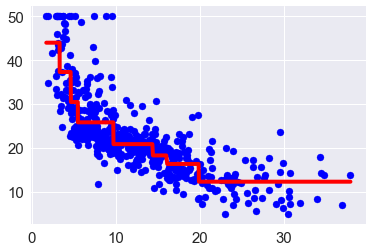

In [64]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
plt.scatter(X, y, c='blue')
sorted_idx = X.flatten().argsort()
plt.plot(X[sorted_idx], tree.predict(X[sorted_idx]), color='red', lw=4)

In [65]:
tree.fit(X_train, y_train)
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)
print('Tree MSE: {:0.4}; R^2: {:0.4}'.format(r2_score(y_test, y_test_pred_tree), mean_squared_error(y_test, y_test_pred_tree)))

Tree MSE: 0.6629; R^2: 28.07


In [ ]:
from sklearn.model_selection import GridSearchCV
 t

In [ ]:
X.flatten().argsort

In [44]:
w = np.array([0], [1]])
#x = np.array([4, 5, 6])
#np.dot(w, x)
#np.sum(w * x)
w

TypeError: data type not understood

In [217]:
def heaviside_step(z):
    if z >= 0:
        return 1
    else:
        return -1

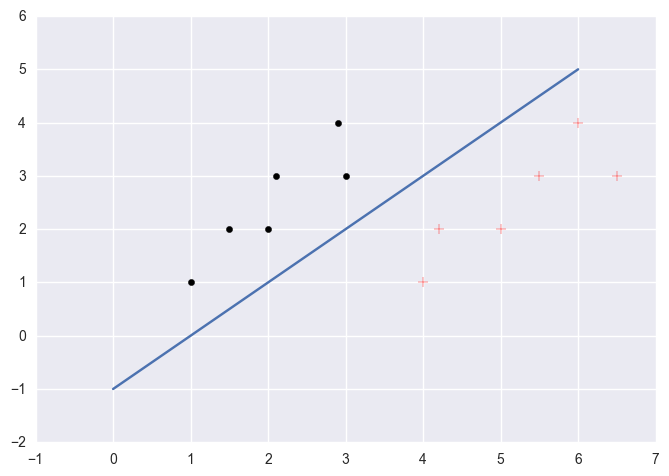

In [426]:
x1 = np.array([1.5, 2.1, 2.9, 3, 2, 1, 6.5, 4.2, 5.5, 6, 4, 5])
x2 = np.array([2, 3, 4, 3, 2, 1, 3, 2, 3, 4, 1, 2])
y = np.array([ -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1])
plt.scatter(x1[:6], x2[:6], marker='o', color='black')
plt.scatter(x1[6:], x2[6:], marker='+', color='red', s=50)

a = np.array(range(7))
b = a - 1
plt.plot(a, b)
#y = mx + b, b = -1, m = 1, y = x - 1
#x2 = 1 * (x1) - 1
#x2 = x1 - 1

In [ ]:
[1 x 3] * [3 x 1] = [1 x 1]
w^T = [1 x 3]
X = [20 x 3]
[1 x 3] * [20 x 3]

In [377]:
w
X = df[['x0', 'x1', 'x2']].values
z = np.dot(w.T, X[0])

In [439]:
_lambda = -.7
w0 = _lambda
w1 = 1
w2 = -1
w = np.array([[w0], [w1], [w2]])
x0 = 1
df = pd.DataFrame({'x0': x0, 'x1': x1, 'x2': x2, 'y': y})
df['z'] = (w0 * df.x0 + w1 * df.x1 + w2 * df.x2)
df['yhat'] = df.z.apply(heaviside_step)
df['error'] = df.y - df.yhat
df['marker'] = df.y.apply(lambda y: '+' if y == 1 else 'o')
df['color'] = df.y.apply(lambda y: 'red' if y == 1 else 'black')
df['size'] = df.y.apply(lambda y: 50 if y == 1 else 20)
#df.loc[df[df.y==1], 'marker'] = '+'
df


,x0,x1,x2,y,z,yhat,error,marker,color,size
0,1,1.5,2,-1,-1.2,-1,0,o,black,20
1,1,2.1,3,-1,-1.6,-1,0,o,black,20
2,1,2.9,4,-1,-1.8,-1,0,o,black,20
3,1,3.0,3,-1,-0.7,-1,0,o,black,20
4,1,2.0,2,-1,-0.7,-1,0,o,black,20
5,1,1.0,1,-1,-0.7,-1,0,o,black,20
6,1,6.5,3,1,2.8,1,0,+,red,50
7,1,4.2,2,1,1.5,1,0,+,red,50
8,1,5.5,3,1,1.8,1,0,+,red,50
9,1,6.0,4,1,1.3,1,0,+,red,50


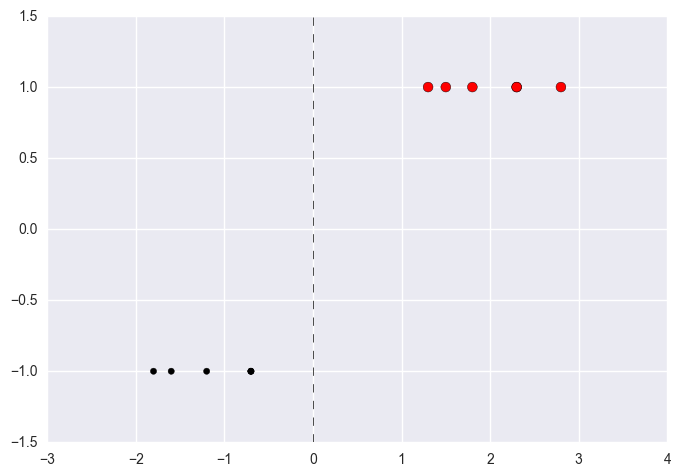

In [440]:
plt.scatter(x=df.z, y=df.yhat, s=df['size'].values, c=df.color)
plt.axvline(0, color='black', lw=0.5, linestyle='--')

$y = mx + b$

$z = w^Tx$

$w_0*x_0 + w_1*x_1 + w_2*x_2 = 0$

$w_0 + w_1*x_1 + w_2*x_2 = 0$


In [438]:
print(x1)
print(x2)
print(y)
print(w0, w1, w2)

[ 1.5  2.1  2.9  3.   2.   1.   6.5  4.2  5.5  6.   4.   5. ]
[2 3 4 3 2 1 3 2 3 4 1 2]
[-1 -1 -1 -1 -1 -1  1  1  1  1  1  1]
-0.7 1 -1


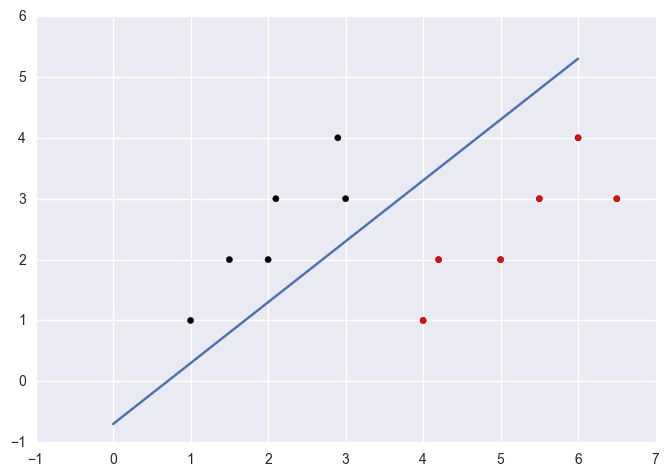

In [443]:
plt.scatter(df.x1, df.x2, c=df.color)
a = np.array(range(7))
b = -(w0 + w1 * a) / w2
plt.plot(a, b)

In [513]:
_lambda = -.1
w0 = _lambda
w1 = 1
w2 = -1
w = np.array([[w0], [w1], [w2]])
x0 = 1
n = 0.01

In [524]:
print(w0, w1, w2)
for i in range(len(X)):
    xi = X[i]
    xi1 = xi[1]
    xi2 = xi[2]
    yi = y[i]
    z = np.dot(w.T, xi)
    yhat = heaviside_step(z)
    delta_w0 = n * (yi - yhat)
    delta_w1 = n * (yi - yhat) * xi1
    delta_w2 = n * (yi - yhat) * xi2
    w0 = w0 + delta_w0
    w1 = w1 + delta_w1
    w2 = w2 + delta_w2
print(w0, w1, w2)
   

-0.1 1.0 -1.0
-0.1 1.0 -1.0


In [351]:
for idx, row in df.iterrows():
    z = w0 * row.x0 + w1 * row.x1 + w2 * row.x2
    yhat = heaviside_step(z)
    delta_w0 = n * (row.y - yhat)
    delta_w1 = n * (row.y - yhat) * row.x1
    delta_w2 = n * (row.y - yhat) * row.x2
    print("w0 before: {}; w0 after: {}".format(w2, w2+delta_w2))
    w0 = w0 + delta_w0
    w1 = w1 + delta_w1
    w2 = w2 + delta_w2
    

w0 before: -1.7999999999999998; w0 after: -1.7999999999999998
w0 before: -1.7999999999999998; w0 after: -1.7999999999999998
w0 before: -1.7999999999999998; w0 after: -1.7999999999999998
w0 before: -1.7999999999999998; w0 after: -2.4
w0 before: -2.4; w0 after: -2.4
w0 before: -2.4; w0 after: -2.4
w0 before: -2.4; w0 after: -2.4
w0 before: -2.4; w0 after: -2.4
w0 before: -2.4; w0 after: -2.4
w0 before: -2.4; w0 after: -2.4
w0 before: -2.4; w0 after: -2.4
w0 before: -2.4; w0 after: -2.4


In [342]:
w2

-1.0